<h4>Stocks Traded Under the Index Till 29-12-2023</h4>
SOURCE: https://www.moex.com/ru/index/IMOEX/constituents

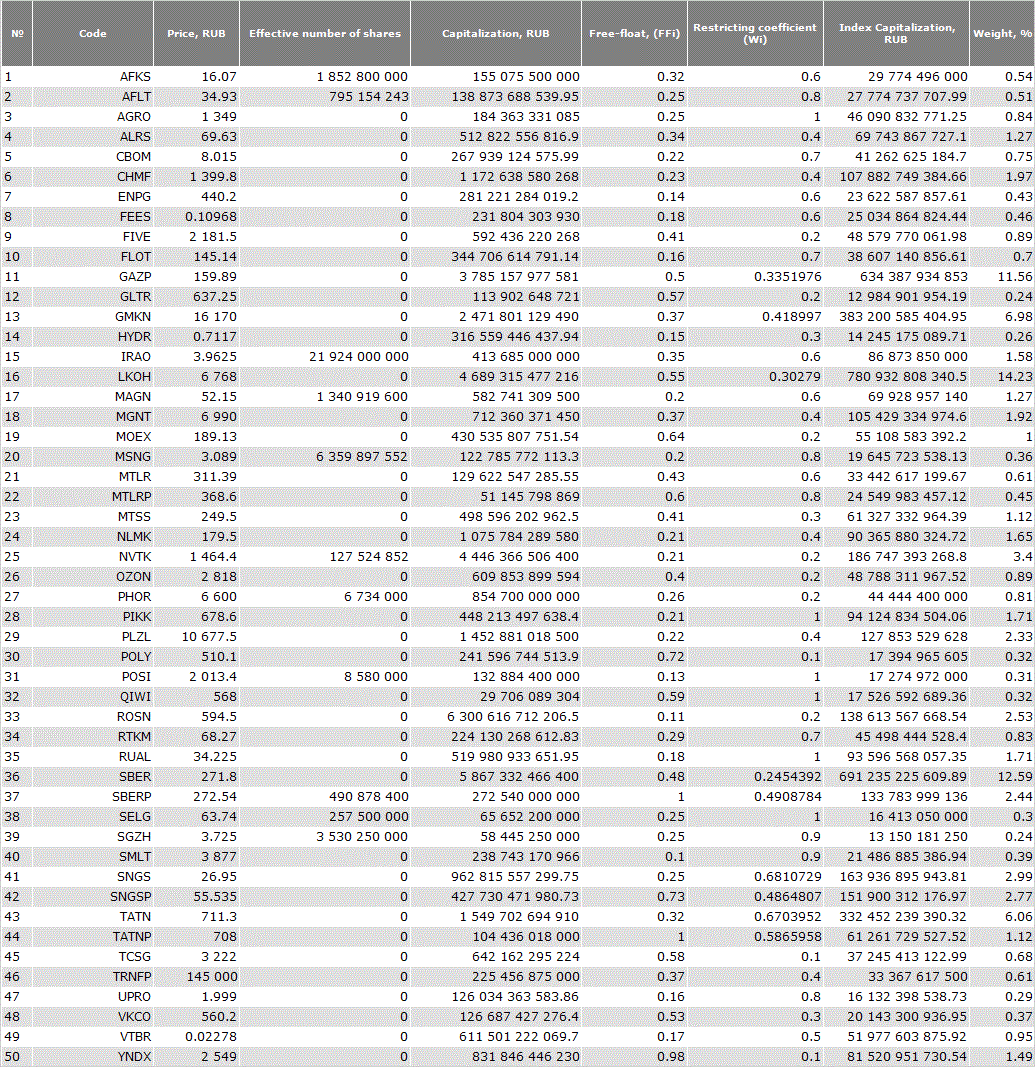

In [10]:
# type: ignore
import pandas as pd  
import matplotlib.pyplot as plt  


In [224]:
data = pd.read_csv("./stocks_data.csv", delimiter=";")

In [225]:
data.head()

,BOARDID,TRADEDATE,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,...,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL,TRADINGSESSION,CURRENCYID,TRENDCLSPR
0,TQBR,2022-10-03,Система ао,AFKS,23463,413029803.5,10.667,10.539,11.295,11.027,...,10.915,10.915,11.027,367572316.9,367572316.9,367572316.9,0,3,SUR,5.16
1,TQBR,2022-10-04,Система ао,AFKS,20210,411046922.5,11.310,10.790,11.450,10.970,...,11.059,11.059,10.970,371973982.7,371973982.7,371973982.7,0,3,SUR,-2.05
2,TQBR,2022-10-05,Система ао,AFKS,22194,398151160.5,11.000,10.335,11.001,10.691,...,10.622,10.622,10.691,378026881.6,378026881.6,378026881.6,0,3,SUR,-2.28
3,TQBR,2022-10-06,Система ао,AFKS,9984,172203305.1,10.789,10.601,10.975,10.669,...,10.771,10.771,10.669,162754458.2,162754458.2,162754458.2,0,3,SUR,-1.28
4,TQBR,2022-10-07,Система ао,AFKS,15003,190877660.8,10.600,10.140,10.600,10.280,...,10.386,10.386,10.280,141480182.7,141480182.7,141480182.7,0,3,SUR,-4.44


In [226]:
df = data[['TRADEDATE','SHORTNAME','SECID','NUMTRADES','VALUE','OPEN','LOW','HIGH','CLOSE','LEGALCLOSEPRICE']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRADEDATE        15900 non-null  object 
 1   SHORTNAME        15900 non-null  object 
 2   SECID            15900 non-null  object 
 3   NUMTRADES        15900 non-null  int64  
 4   VALUE            15900 non-null  float64
 5   OPEN             15824 non-null  float64
 6   LOW              15824 non-null  float64
 7   HIGH             15824 non-null  float64
 8   CLOSE            15824 non-null  float64
 9   LEGALCLOSEPRICE  15900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
# Fill null values in 'CLOSE' column with values from 'LEGALCLOSEPRICE' column
df['CLOSE'].fillna(df['LEGALCLOSEPRICE'], inplace=True)


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRADEDATE        15900 non-null  object 
 1   SHORTNAME        15900 non-null  object 
 2   SECID            15900 non-null  object 
 3   NUMTRADES        15900 non-null  int64  
 4   VALUE            15900 non-null  float64
 5   OPEN             15824 non-null  float64
 6   LOW              15824 non-null  float64
 7   HIGH             15824 non-null  float64
 8   CLOSE            15900 non-null  float64
 9   LEGALCLOSEPRICE  15900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df['50MA'] = df.groupby('SECID')['CLOSE'].transform(lambda x: round(x.rolling(window=50).mean(), 2))

In [230]:
df = df[df.TRADEDATE > "2022-12-31"].reset_index(drop=True)

In [231]:
df

,TRADEDATE,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,CLOSE,LEGALCLOSEPRICE,50MA
0,2023-01-03,Система ао,AFKS,5116,7.590003e+07,11.937,11.937,12.190,12.169,12.150,12.48
1,2023-01-04,Система ао,AFKS,4836,7.212171e+07,12.210,12.034,12.263,12.263,12.260,12.48
2,2023-01-05,Система ао,AFKS,4442,6.375600e+07,12.266,12.090,12.286,12.105,12.100,12.48
3,2023-01-06,Система ао,AFKS,4553,7.564336e+07,12.095,11.985,12.178,12.039,12.002,12.47
4,2023-01-09,Система ао,AFKS,16664,5.227263e+08,12.076,11.803,12.182,11.879,11.900,12.45
...,...,...,...,...,...,...,...,...,...,...,...
12695,2023-12-25,Yandex clA,YNDX,103077,9.965899e+09,2300.000,2297.000,2455.800,2396.600,2380.000,2505.55
12696,2023-12-26,Yandex clA,YNDX,60910,3.709901e+09,2399.800,2361.000,2439.800,2427.600,2420.000,2503.55
12697,2023-12-27,Yandex clA,YNDX,85965,6.993858e+09,2428.000,2428.000,2574.600,2550.000,2517.400,2504.01
12698,2023-12-28,Yandex clA,YNDX,70098,5.393594e+09,2594.200,2520.000,2610.000,2531.200,2547.000,2501.42


In [59]:
df.to_csv("imoex_stocks.csv", index=False)

In [232]:
processed_data = pd.read_csv("imoex_stocks.csv")

In [235]:
processed_data = processed_data[['TRADEDATE','SECID','CLOSE','50MA']]

In [236]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12700 entries, 0 to 12699
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRADEDATE  12700 non-null  object 
 1   SECID      12700 non-null  object 
 2   CLOSE      12700 non-null  float64
 3   50MA       12700 non-null  float64
dtypes: float64(2), object(2)
memory usage: 397.0+ KB


In [ ]:
processed_data['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])

# Filter rows where 'CLOSE' price is greater than '50MA'
above_50ma = processed_data[processed_data['CLOSE'] > processed_data['50MA']]

# Calculate the total number of stocks traded for each day
total_traded_per_day = processed_data.groupby('TRADEDATE').size()

# Calculate the number of stocks traded above 50MA for each day
above_50ma_per_day = above_50ma.groupby('TRADEDATE').size()

# Calculate the proportion of stocks traded above 50MA for each day
proportion_above_50ma = above_50ma_per_day / total_traded_per_day

result_df = pd.DataFrame({
    'DATE': proportion_above_50ma.index,
    'Traded Above 50MA(1D)': proportion_above_50ma.values
})


In [238]:
result_df

,DATE,Traded Above 50MA(1D)
0,2023-01-03,0.54
1,2023-01-04,0.52
2,2023-01-05,0.52
3,2023-01-06,0.50
4,2023-01-09,0.58
...,...,...
249,2023-12-25,0.38
250,2023-12-26,0.36
251,2023-12-27,0.32
252,2023-12-28,0.34


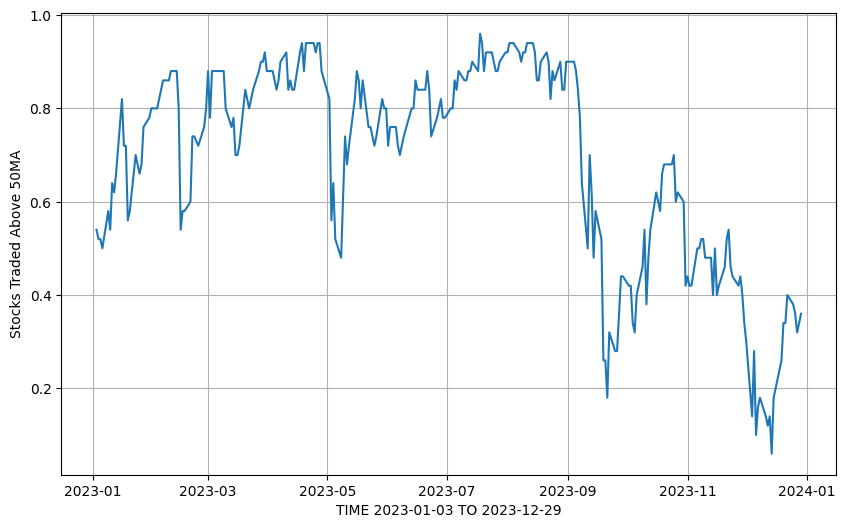

In [250]:
plt.figure(figsize=(10, 6))
plt.plot(proportion_above_50ma.index, proportion_above_50ma.values)
plt.xlabel('TIME 2023-01-03 TO 2023-12-29')
plt.ylabel('Stocks Traded Above 50MA')
plt.grid(True)
plt.show()

In [1]:
# IMOEX INDEX 
import pandas as pd 
imoex_index = pd.read_csv("./imoex_index.csv", delimiter=";")
index_df = imoex_index[['TRADEDATE', 'SECID', 'CLOSE']]
index_df['50MA'] = index_df['CLOSE'].transform(lambda x: round(x.rolling(window=50).mean(), 2))
index_df = index_df[index_df.TRADEDATE > "2022-12-31"].reset_index(drop=True)

/var/folders/0t/bxht3p_n0_7cfm09_zdc1xkh0000gn/T/ipykernel_28195/3009390711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_df['50MA'] = index_df['CLOSE'].transform(lambda x: round(x.rolling(window=50).mean(), 2))


In [5]:
index_df.to_csv("imoex_index.csv", index=False)

In [6]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRADEDATE  254 non-null    object 
 1   SECID      254 non-null    object 
 2   CLOSE      254 non-null    float64
 3   50MA       254 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.1+ KB


In [7]:
index_df['TRADEDATE'] = pd.to_datetime(index_df['TRADEDATE'])

In [8]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TRADEDATE  254 non-null    datetime64[ns]
 1   SECID      254 non-null    object        
 2   CLOSE      254 non-null    float64       
 3   50MA       254 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.1+ KB


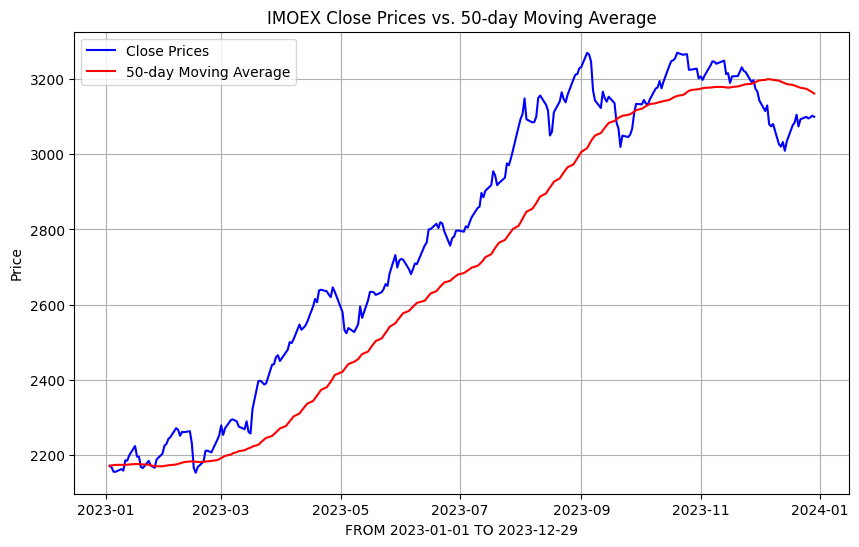

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(index_df['TRADEDATE'], index_df['CLOSE'], label='Close Prices', color='blue')

# 50MA
plt.plot(index_df['TRADEDATE'], index_df['50MA'], label='50-day Moving Average', color='red')


plt.xlabel('FROM 2023-01-01 TO 2023-12-29')
plt.ylabel('Price')
plt.title('IMOEX Close Prices vs. 50-day Moving Average')
plt.legend()
plt.grid(True)
plt.show()


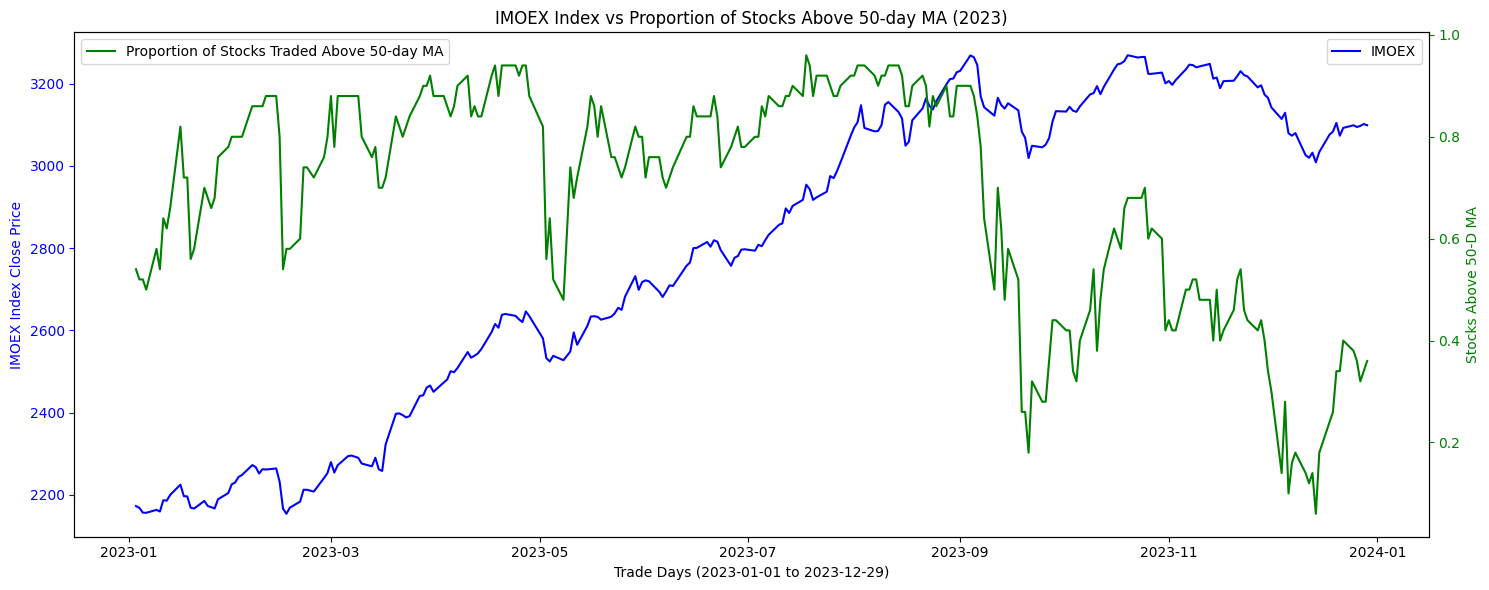

In [263]:
# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot IMOEX index on the primary y-axis
ax1.plot(index_df['TRADEDATE'], index_df['CLOSE'], label='IMOEX', color='blue')
ax1.set_xlabel('Trade Days (2023-01-01 to 2023-12-29)')
ax1.set_ylabel('IMOEX Index Close Price', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for the proportion of stocks above 50-day MA
ax2 = ax1.twinx()
ax2.plot(proportion_above_50ma.index, proportion_above_50ma.values, label='Proportion of Stocks Traded Above 50-day MA', color='green')
ax2.set_ylabel('Stocks Above 50-D MA', color='green')
ax2.tick_params('y', colors='green')

ax1.legend()
ax2.legend(loc="upper left")

plt.title('IMOEX Index vs Proportion of Stocks Above 50-day MA (2023)')
fig.tight_layout()
plt.show()
